In [1]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-talk')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv("Dados-Pesquisa.csv", sep = ',', low_memory=False)

In [3]:
print(df.head())

    Age  AttendedBootcamp  BootcampFinish  BootcampFullJobAfter  \
0  28.0               0.0             NaN                   NaN   
1  22.0               0.0             NaN                   NaN   
2  19.0               0.0             NaN                   NaN   
3  26.0               0.0             NaN                   NaN   
4  20.0               0.0             NaN                   NaN   

   BootcampLoanYesNo  BootcampMonthsAgo BootcampName  BootcampPostSalary  \
0                NaN                NaN          NaN                 NaN   
1                NaN                NaN          NaN                 NaN   
2                NaN                NaN          NaN                 NaN   
3                NaN                NaN          NaN                 NaN   
4                NaN                NaN          NaN                 NaN   

   BootcampRecommend  ChildrenNumber  ... ResourceSoloLearn  \
0                NaN             NaN  ...               NaN   
1             

In [4]:
# Lista todas as colunas
list(df)

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampFullJobAfter',
 'BootcampLoanYesNo',
 'BootcampMonthsAgo',
 'BootcampName',
 'BootcampPostSalary',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventBootcamp',
 'CodeEventCoffee',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWomenCode',
 'CodeEventWorkshop',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'Gender',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinorit

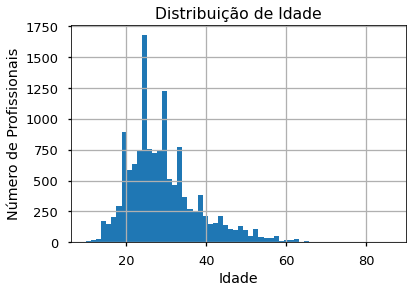

In [5]:
# Qual a distribuição de idade dos participantes da pesquisa?
# A maioria dos profissionais que trabalham como programadores de 
# software estão na faixa de idade entre 20 e 30 anos, sendo 25 anos 
# a idade mais frequente.

# Gerando um histograma
df.Age.hist(bins = 60)
plt.xlabel("Idade")
plt.ylabel("Número de Profissionais")
plt.title("Distribuição de Idade")
plt.show()

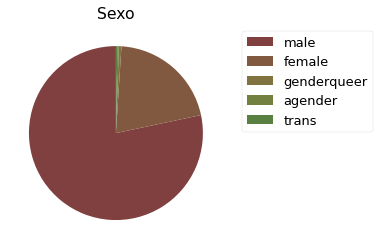

In [6]:
# Qual é a distribuição de sexo dos participantes da pesquisa?
# A grande maioria dos programadores é do sexo masculino

# Definindo a quantidade
labels = df.Gender.value_counts().index
num = len(df.EmploymentField.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Pizza
fatias, texto = plt.pie(df.Gender.value_counts(), colors = listaRGB, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.05,1))
plt.title("Sexo")
plt.show()

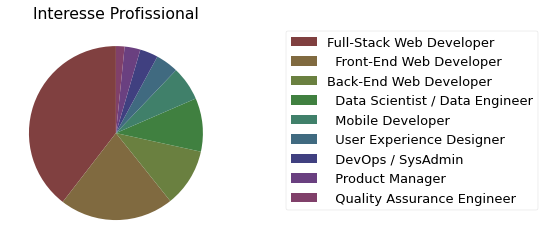

In [9]:
# Quais sãos os principais interesses dos participantes da pesquisa?
# O principal interesse profissional dos programadores é o desenvolvimento web (Full-Stack, Front-End e Back-End), 
# seguido pela área de Data Science.

# Definindo a quantidade
num = len(df.JobRoleInterest.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))
labels = df.JobRoleInterest.value_counts().index
colors = ['OliveDrab', 'Orange', 'OrangeRed', 'DarkCyan', 'Salmon', 'Sienna', 'Maroon', 'LightSlateGrey', 'DimGray']

# Gráfico de Pizza
fatias, texto = plt.pie(df.JobRoleInterest.value_counts(), colors = listaRGB, startangle = 90)
#plt.axes().set_aspect('equal', 'datalim')
plt.legend(fatias, labels, bbox_to_anchor = (1.25, 1))
plt.title("Interesse Profissional")
plt.show()

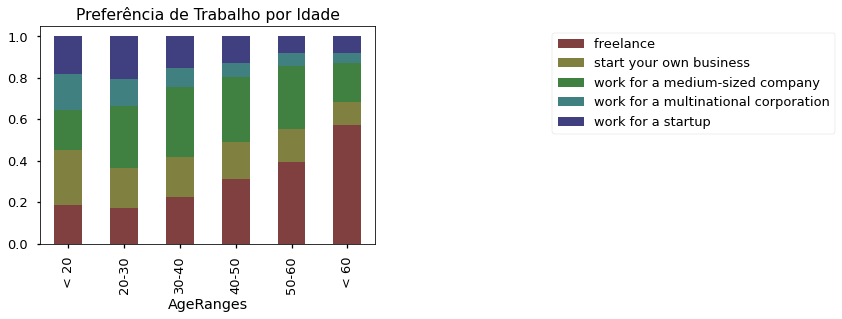

In [10]:
# Quais são as preferências de trabalho por idade?
# Perceba que à medida que a idade aumenta, o interesse por trabalho 
# freelance também aumenta, sendo o modelo preferido por profissionais 
# acima de 60 anos. Profissionais mais jovens preferem trabalhar em 
# Startups ou no seu próprio negócio. Profissionais entre 20 e 50 anos 
# preferem trabalhar em empresas de tamanho médio.

# Agrupando os dados
df_ageranges = df.copy()
bins=[0, 20, 30, 40, 50, 60, 100]

df_ageranges['AgeRanges'] = pd.cut(df_ageranges['Age'], 
                                   bins, 
                                   labels=["< 20", "20-30", "30-40", "40-50", "50-60", "< 60"]) 

df2 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobPref).apply(lambda r: r/r.sum(), axis=1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df2.plot(kind = "bar", stacked = True, color = listaRGB, title = "Preferência de Trabalho por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor = (1.51, 1))

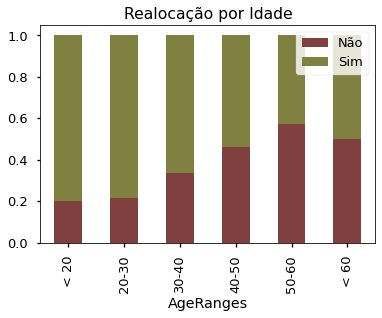

In [11]:
# Qual o objetivo de realocação?
# A vontade de buscar um novo emprego diminui com a idade. 
# Quase 80% das pessoas abaixo dos 30 anos estão preparadas para isso.

# Agrupando os dados
df3 = pd.crosstab(df_ageranges.AgeRanges, 
                  df_ageranges.JobRelocateYesNo).apply(lambda r: r/r.sum(), axis = 1)

# Definindo a quantidade
num = len(df_ageranges.AgeRanges.value_counts().index)

# Criando a lista de cores
listaHSV = [(x*1.0/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de Barras (Stacked)
ax1 = df3.plot(kind = "bar", stacked = True, color = listaRGB, title = "Realocação por Idade")
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines,["Não", "Sim"], loc = 'best')

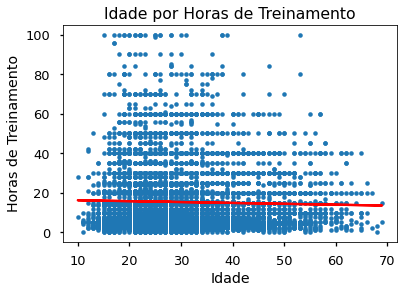

In [12]:
# Qual a relação entre idade e horas de aprendizagem?
# A idade dos profissionais não afeta a quantidade de tempo gasto com capacitação e treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df9 = df.copy()
df9 = df9.dropna(subset=["HoursLearning"])
df9 = df9[df['Age'].isin(range(0,70))]

# Definindo os valores de x e y
x = df9.Age
y = df9.HoursLearning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Idade")
plt.ylabel("Horas de Treinamento")
plt.title("Idade por Horas de Treinamento")
plt.show()

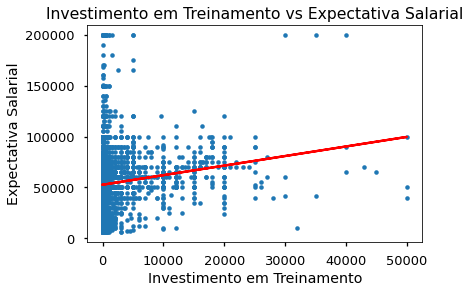

In [13]:
# Qual a relação entre investimento em capacitação e expectativa salarial?
# Os profissionais que investem tempo e dinheiro em capacitação e 
# treinamento, em geral, conseguem salários mais altos, embora alguns 
# profisisonais esperem altos salários, investindo 0 em treinamento.

import warnings
warnings.filterwarnings('ignore')

# Criando subset dos dados
df5 = df.copy()
df5 = df5.dropna(subset=["ExpectedEarning"])
df5 = df5[df['MoneyForLearning'].isin(range(0,60000))]

# Definindo os valores de x e y
x = df5.MoneyForLearning
y = df5.ExpectedEarning

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Investimento em Treinamento")
plt.ylabel("Expectativa Salarial")
plt.title("Investimento em Treinamento vs Expectativa Salarial")
plt.show()